# E 3-1,2,3,4
1. I can identify what charge should be included in the electric field contribution at a specified point.
2. I can estimate the direction and magnitude of the electric field due to a point charge at an arbitrary location.
3. I can analytically calculate the electric field due to a point charge at an arbitrary location.
4. I can identify which sources make the largest contribution to an electric field at a specified location and draw an approximate electric field map based on this knowledge.

## Visualize Dipole

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

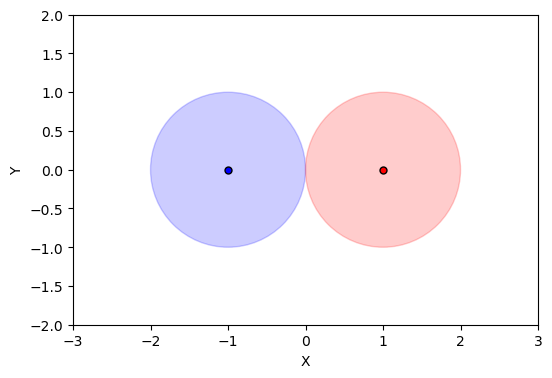

In [2]:
def draw_charge(ax, position, color, radius=1):
    """Draws a circle at the given position with the specified color and radius."""
    circle = plt.Circle(position, radius, color=color, alpha=0.2)
    ax.add_patch(circle)
    ax.scatter(*position, color=color, edgecolor='black', s=25)  # Draw central point


# Define charge positions
n_charge_pos = (-1, 0)
p_charge_pos = (1, 0)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Set axis limits
ax.set_xlim([-3, 3])
ax.set_ylim([-2, 2])

# Label Axes
ax.set_xlabel("X")
ax.set_ylabel("Y")

# Ensure equal aspect ratio
ax.set_aspect('equal')

# Draw charges
draw_charge(ax, n_charge_pos, 'blue')
draw_charge(ax, p_charge_pos, 'red')

# Show the final plot
plt.show()

## Visualize the Electric Field
1. Negative E-Field.
2. Positive E-Field.
3. Net E-Field.

In [34]:
'''
class PointCharge:
    """Class to represent a point charge and compute electric field in 2D."""
    k = 8.99e9  # Coulomb's constant in N·m²/C²
    bounds=(-2, 2, -2, 2)
    
    def __init__(self, position, charge):
        self.position = np.array(position, dtype=float)
        self.charge = charge
    
    def electric_field_point_charge(self, point):
        """Computes the electric field vector at a given point."""
        r_vec = np.array(point, dtype=float) - self.position
        r_mag = np.linalg.norm(r_vec)

        # Debugging: Check if we're too close to the charge (singularity check)
        if r_mag < 0.1:  # Avoid singularity at charge location
            print(f"Point too close to charge at {self.position}, r_mag: {r_mag}")
            return np.array([0.0, 0.0])

        # Compute electric field
        E_field_pc = (self.k * self.charge / r_mag**2) * (r_vec / r_mag)

        # Check if field has any NaN or Inf values (which can happen when distance is too small)
        if np.any(np.isnan(E_field_pc)) or np.any(np.isinf(E_field_pc)):
            print(f"Invalid field at point {point}, r_mag: {r_mag}, field: {E_field_pc}")
            return np.array([0.0, 0.0])

        return E_field_pc

    def electric_field_net(self, points):
        """Computes the electric field vector at a given point."""
        r_vec = np.array(point, dtype=float) - self.position
        r_mag = np.linalg.norm(r_vec)

        # Debugging: Check if we're too close to the charge (singularity check)
        if r_mag < 0.1:  # Avoid singularity at charge location
            print(f"Point too close to charge at {self.position}, r_mag: {r_mag}")
            return np.array([0.0, 0.0])

        # Compute electric field
        E_field_net = (self.k * self.charge / r_mag**2) * (r_vec / r_mag)

        # Check if field has any NaN or Inf values (which can happen when distance is too small)
        if np.any(np.isnan(E_field_net)) or np.any(np.isinf(E_field_net)):
            print(f"Invalid field at point {point}, r_mag: {r_mag}, field: {E_field_net}")
            return np.array([0.0, 0.0])

        return E_field_net

    def generate_field_grid(self, bounds):
        """Generates a grid of points and computes the electric field at each point."""
        x_min, x_max, y_min, y_max = bounds
        x = np.linspace(x_min, x_max, self.grid_size[0])
        y = np.linspace(y_min, y_max, self.grid_size[1])
        X, Y = np.meshgrid(x, y)

        Ex, Ey = np.zeros_like(X), np.zeros_like(Y)
        B_magnitude = np.zeros_like(X)  # Store magnitudes for scaling

        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                for k in range(X.shape[2]):
                    E = self.compute_field(X[i, j, k], Y[i, j, k], Z[i, j, k])
                    Ex[i, j, k], Ey[i, j, k] = E
                    E_magnitude[i, j, k] = np.linalg.norm(E)  # Store magnitude

        return X, Y, Ex, Ey, E_magnitude


    def plot_field(self, ax, c, bounds):
        """Plots the E-field vectors in 2D"""
        X, Y, Ex, Ey, E_magnitude = self.generate_field_grid(bounds)
        
        # Normalize the vectors by their magnitudes (to scale properly)
        E_magnitude = np.clip(E_magnitude, 1e-3, np.max(E_magnitude))  # Clip to avoid division by zero
        
        # Scale the vectors by their magnitudes for visualization
        Ex_scaled = Ex / E_magnitude
        Ey_scaled = Ey / E_magnitude
        
        # Plot the electric field vectors (quiver plot)
        ax.quiver(X, Y, Ex_scaled, Ey_scaled, color=c, alpha=0.6)

        # Mark the point charge center
        ax.scatter(*self.dipole_center, color=c, s=25, label='Dipole Center')

    def draw_charge_region(ax, position, color, radius=1):
    """Draws a circle at the given position with the specified color and radius."""
    circle = plt.Circle(position, radius, color=color, alpha=0.2)
    ax.add_patch(circle)
'''

In [42]:
class PointCharge:
    """Class to represent a point charge and compute electric field in 2D."""
    k = 8.99e9  # Coulomb's constant in N·m²/C²
    
    def __init__(self, position, charge):
        self.position = np.array(position, dtype=float)
        self.charge = charge
    
    def electric_field_point_charge(self, point):
        """Computes the electric field vector at a given point from this charge."""
        r_vec = np.array(point, dtype=float) - self.position
        r_mag = np.linalg.norm(r_vec)

        if r_mag < 1e-3:  # Avoid singularity near the charge
            return np.array([0.0, 0.0])

        E_field = (self.k * self.charge / r_mag**2) * (r_vec / r_mag)
        return E_field

    @staticmethod
    def generate_net_field_grid(charges, bounds, grid_size=(20, 20)):
        """Computes the net electric field at each point in a grid for multiple point charges."""
        x_min, x_max, y_min, y_max = bounds
        x = np.linspace(x_min, x_max, grid_size[0])
        y = np.linspace(y_min, y_max, grid_size[1])
        X, Y = np.meshgrid(x, y)

        # Initialize Ex, Ey to zero (net field components)
        Ex_net = np.zeros_like(X)
        Ey_net = np.zeros_like(Y)
        
        # Sum contributions from all charges
        for charge in charges:
            Ex, Ey = charge.generate_field_grid(bounds, grid_size)[2:4]  # Get Ex, Ey from charge
            Ex_net += Ex
            Ey_net += Ey

        # Compute the magnitude of the net field
        E_magnitude_net = np.sqrt(Ex_net**2 + Ey_net**2)

        return X, Y, Ex_net, Ey_net, E_magnitude_net


    def generate_field_grid(self, bounds, grid_size=(20, 20)):
        """Generates a grid of points and computes the electric field at each point."""
        x_min, x_max, y_min, y_max = bounds
        x = np.linspace(x_min, x_max, grid_size[0])
        y = np.linspace(y_min, y_max, grid_size[1])
        X, Y = np.meshgrid(x, y)

        Ex, Ey = np.zeros_like(X), np.zeros_like(Y)
        E_magnitude = np.zeros_like(X)

        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                E = self.electric_field_point_charge([X[i, j], Y[i, j]])
                Ex[i, j], Ey[i, j] = E
                E_magnitude[i, j] = np.linalg.norm(E)

        return X, Y, Ex, Ey, E_magnitude

    def plot_field(self, ax, color, bounds, grid_size=(20, 20), E_max_limit=10, scale_factor=1e2):
        """Plots the E-field vectors in 2D with correct magnitudes, ensuring visibility."""
        X, Y, Ex, Ey, E_magnitude = self.generate_field_grid(bounds, grid_size)

        # Create a mask where E_magnitude is within the acceptable range
        mask = E_magnitude <= E_max_limit

        # Apply the mask to filter out extreme values
        X, Y = X[mask], Y[mask]
        Ex, Ey = Ex[mask], Ey[mask]
        E_magnitude = E_magnitude[mask]  # Also filter magnitudes to prevent color scaling issues

        # Scale arrows for better visibility
        Ex_scaled = scale_factor * Ex / np.max(E_magnitude)
        Ey_scaled = scale_factor * Ey / np.max(E_magnitude)

        # Plot the filtered quiver plot
        ax.quiver(X, Y, Ex_scaled, Ey_scaled, E_magnitude, color=color, alpha=0.75, cmap='coolwarm')

        # Mark the charge center
        ax.scatter(*self.position, color=color, s=25, edgecolor='black', label=f'Charge {self.charge:.1e} C')

    @staticmethod
    def plot_net_field(ax, charges, bounds, grid_size=(100, 100), E_max_limit=75, scale_factor=1):
        """Plots the net electric field of multiple charges with black field lines."""
        X, Y, Ex_net, Ey_net, E_magnitude_net = PointCharge.generate_net_field_grid(charges, bounds, grid_size)

        # Mask extreme values to avoid unrealistic arrows
        mask = E_magnitude_net <= E_max_limit
        X, Y = X[mask], Y[mask]
        Ex_net, Ey_net = Ex_net[mask], Ey_net[mask]
        E_magnitude_net = E_magnitude_net[mask]

        # Scale arrows for better visibility
        Ex_scaled = scale_factor * Ex_net / np.max(E_magnitude_net)
        Ey_scaled = scale_factor * Ey_net / np.max(E_magnitude_net)

        # Plot the net electric field with black arrows
        ax.quiver(X, Y, Ex_scaled, Ey_scaled, color="black", alpha=0.75)

        # Mark charge locations with appropriate colors
        for charge in charges:
            charge_color = "blue" if charge.charge < 0 else "red"
            ax.scatter(*charge.position, color=charge_color, s=50, edgecolor="black", label=f'Charge {charge.charge:.1e} C')

    def draw_charge_region(self, ax, color, radius=1):
        """Draws a circle around the charge position."""
        circle = plt.Circle(self.position, radius, color=color, alpha=0.05)
        ax.add_patch(circle)

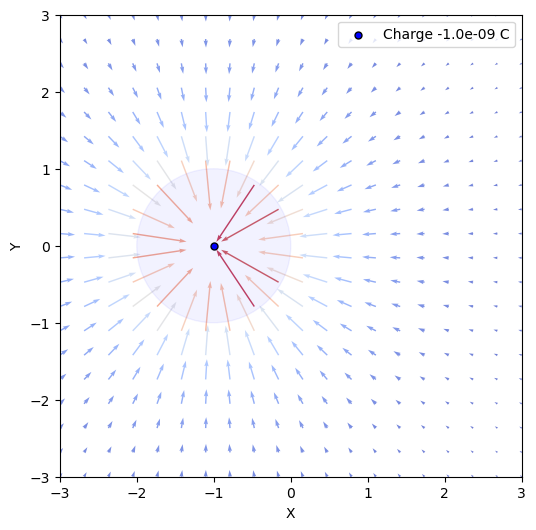

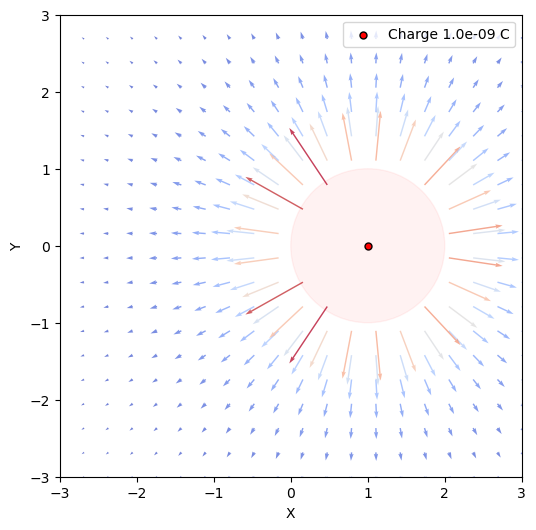

In [7]:
########################
# Negative Charge Field
########################
# Define a single negative charge
negative_charge = PointCharge(position=(-1, 0), charge=-1e-9)  # -1 nC charge
fig, ax = plt.subplots(figsize=(6, 6)) # Create figure and axis
# Set plot limits
bounds = (-3, 3, -3, 3)
ax.set_xlim([bounds[0], bounds[1]])
ax.set_ylim([bounds[2], bounds[3]])
# Label axes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_aspect('equal')
# Plot the electric field for the negative charge
negative_charge.plot_field(ax, color='blue', bounds=bounds)
# Draw charge region
negative_charge.draw_charge_region(ax, color="blue")
# Show plot
plt.legend()
plt.show()


########################
# Positive Charge Field
########################
# Define a single positive charge
positive_charge = PointCharge(position=(1, 0), charge=1e-9)  # 1 nC charge
fig, ax = plt.subplots(figsize=(6, 6)) # Create figure and axis
# Set plot limits
bounds = (-3, 3, -3, 3)
ax.set_xlim([bounds[0], bounds[1]])
ax.set_ylim([bounds[2], bounds[3]])
# Label axes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_aspect('equal')
# Plot the electric field for the positive charge
positive_charge.plot_field(ax, color='red', bounds=bounds)
# Draw charge region
positive_charge.draw_charge_region(ax, color="red")
# Show plot
plt.legend()
plt.show()

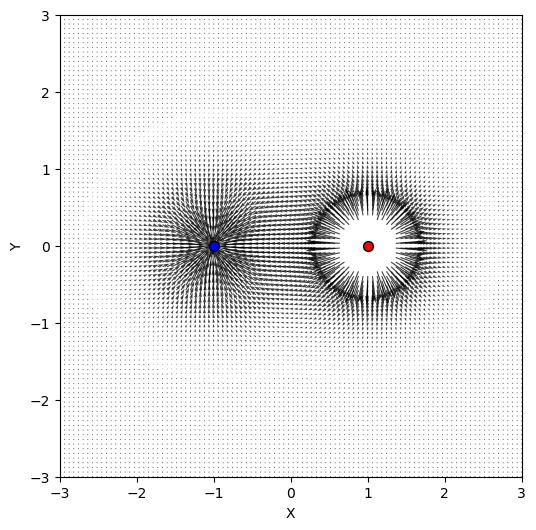

In [43]:
###################
# Net Charge Field
###################
# Create figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_aspect('equal')

# Define charges
negative_charge = PointCharge(position=(-1, 0), charge=-1e-9)
positive_charge = PointCharge(position=(1, 0), charge=1e-9)

# Plot the net field of both charges
PointCharge.plot_net_field(ax, [negative_charge, positive_charge], bounds=(-3, 3, -3, 3))

# Show plot
plt.show()

^^ Took me a while to realize that I thought this was wrong because it doesn't look symmetric, but the vector's start the same distance away from each point, but they don't end that way.

## For the Excellent
Modeling the E field of a dipole at far distances.
Proof:

In [49]:
import sympy as sp

# Define constants
k, q, d = sp.symbols('k q d', real=True, positive=True)

# Define position variables
x, y, z = sp.symbols('x y z', real=True)

# Define dipole moment p = q * d in x-direction
p = q * d
p_vec = sp.ImmutableDenseMatrix([p, 0, 0])

# Define observation point r
r_vec = sp.ImmutableDenseMatrix([x, y, z])
r_mag = sp.sqrt(x**2 + y**2 + z**2)
r_hat = r_vec / r_mag  # Unit vector in the direction of r

# Compute dot product p . r
p_dot_r = sum(p_vec[i] * r_hat[i] for i in range(3))

# Compute far-field electric field using dipole formula
E_far = k * ((3 * p_dot_r * r_hat / r_mag**3) - (p_vec / r_mag**3))

# Expand and simplify the far-field approximation
E_far_simplified = sp.simplify(E_far)

# Display results
E_far_simplified


Matrix([
[d*k*q*(2*x**2 - y**2 - z**2)/(x**2 + y**2 + z**2)**(5/2)],
[                 3*d*k*q*x*y/(x**2 + y**2 + z**2)**(5/2)],
[                 3*d*k*q*x*z/(x**2 + y**2 + z**2)**(5/2)]])